The sinking of the Titanic is one of the biggest maritime disaster in the history, killing 1502 out of 2224 passengers and the crew. One of the reasons for such loss was that there were not enough lifeboats. Some groups of people were more likely to survive than others, such as women, children, and the upper-class.
Use logistic regression to predict the survival of a given passenger based on features, such as sex, age etc. 

# Variable Notes
 - pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
 - age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
 - sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
 - parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Rohit Kr\Desktop\machine Learning\Titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns

- Survived
- Pclass
- Sex 
- parch
- Embarked



# Numerical columns

- Age
- Fare
- PassengerId

# Mixed Columns

- Name 
- Ticket
- Cabin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Conclusions
- 1. Missing values ion Age,Cabin and Embarkes Columns.
- 2. More than 70 percent valies are missing in cabin columns, will have to drop.
- 3. Few columns have inappropriate(unfair) data type.

In [9]:
# Dropping cabin columns
df.drop(columns=['Cabin'],inplace=True)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
# imputing missing values for embarked 
# Finding the most appeared value in embarked column

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].fillna("S",inplace=True)

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# check the one or more thing.....

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Changing data type for the followings columns.

- Survived (Category)
- Pclass (Category)
- Sex (Category)
- Age (int)
- Embarked (Category)

In [18]:
df['Survived']= df['Survived'].astype('category')
df['Pclass']= df['Pclass'].astype('category')
df['Sex']= df['Sex'].astype('category')
df['Age']= df['Age'].astype('int')
df['Embarked']= df['Embarked'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [20]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64
Out of 891 = 62% peoples died in the accident.


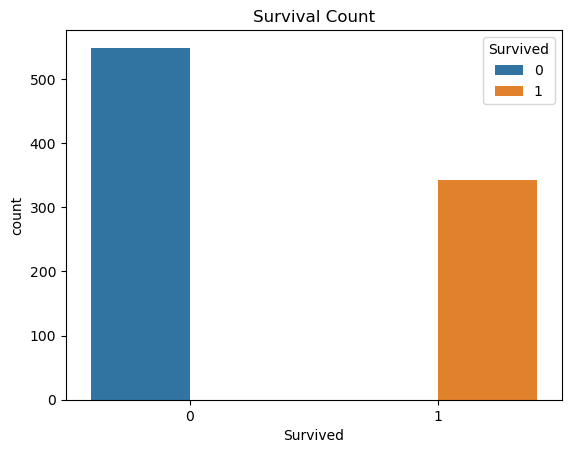

In [21]:
dff = df['Survived'].value_counts()
print(dff)


sns.countplot(x='Survived',hue='Survived', data=df)
plt.title('Survival Count')
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 = {}% peoples died in the accident.".format(death_percent))
plt.show()

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

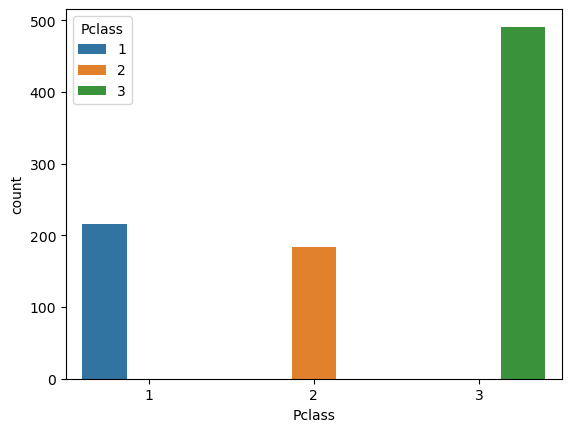

In [22]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass',hue='Pclass', data=df)
# pclass was the crowded 

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

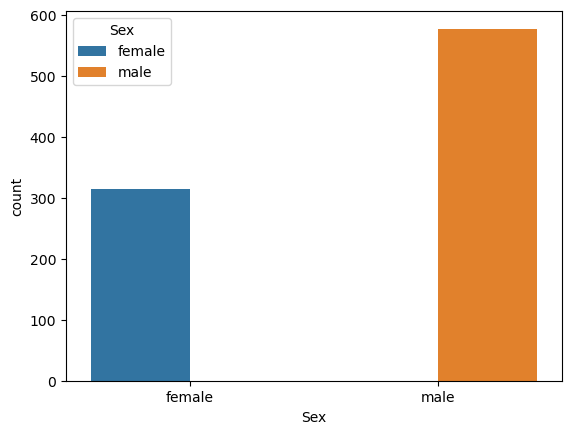

In [23]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex',hue='Sex', data=df)


0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

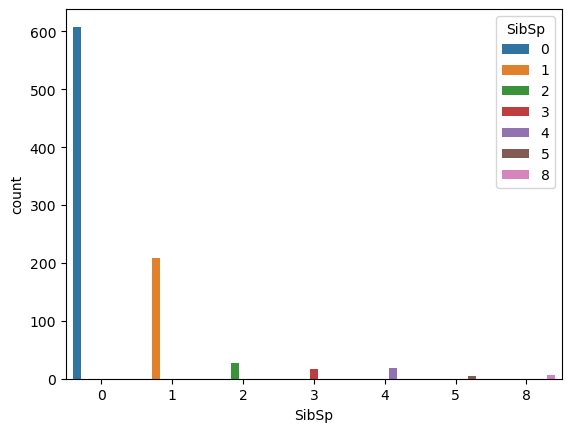

In [24]:
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(x='SibSp',hue='SibSp', data=df)


0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

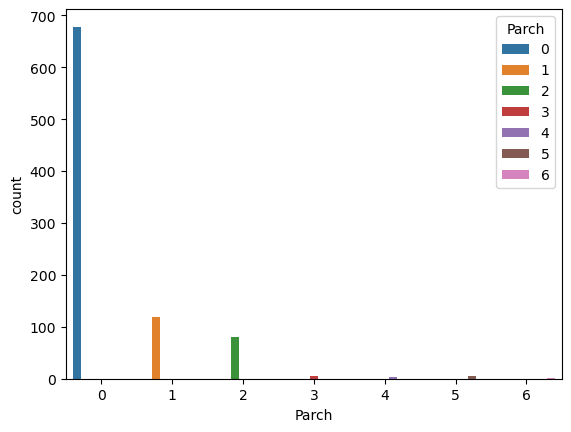

In [25]:
print((df['Parch'].value_counts()/891)*100)
sns.countplot(x='Parch',hue='Parch', data=df)


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

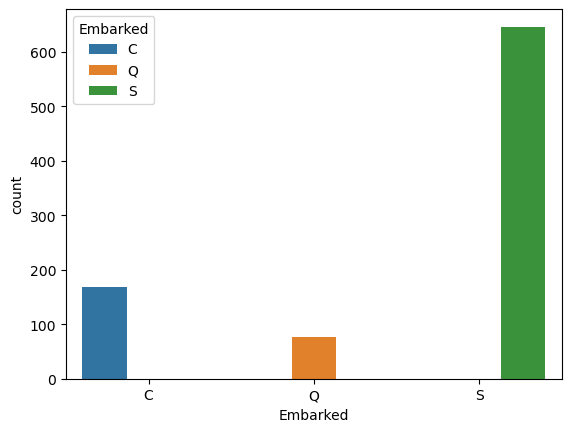

In [26]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked',hue='Embarked', data=df)

C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\4214882477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877
This is close to the normal data


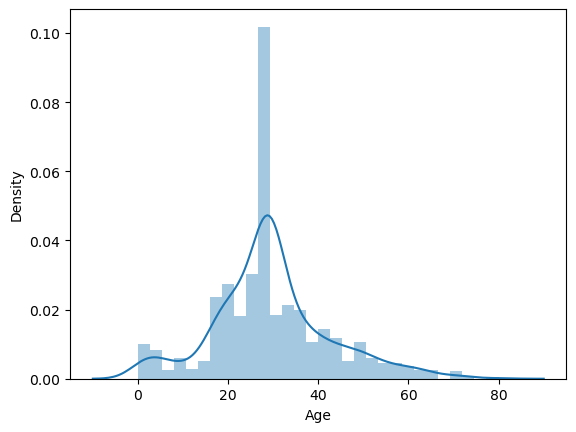

In [27]:
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())
print( f'This is close to the normal data')

<Axes: >

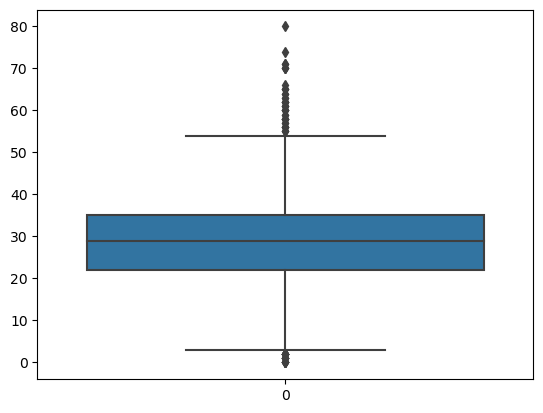

In [28]:
sns.boxplot(df['Age'])

In [29]:
print('People with age in between 60 and 70 are',df[(df['Age']>60) & (df['Age']<70)].shape[0])
print('People with age greater then 70 and 75 are',df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print('People with age greater then 70 and 75 are',df[df['Age']>75].shape[0])
print('-'*50)
print('People with age between 0 and 1 =',df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater then 70 and 75 are 6
People with age greater then 70 and 75 are 1
--------------------------------------------------
People with age between 0 and 1 = 7


4.787316519674893
33.39814088089868


C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\398100842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


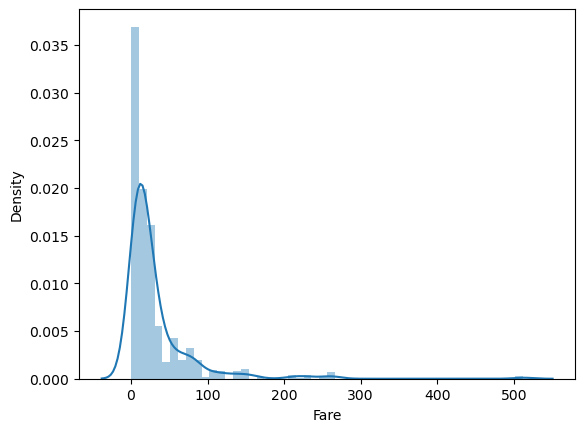

In [30]:
sns.distplot(df['Fare'])
print(df['Fare'].skew())
print(df['Fare'].kurt())

<Axes: >

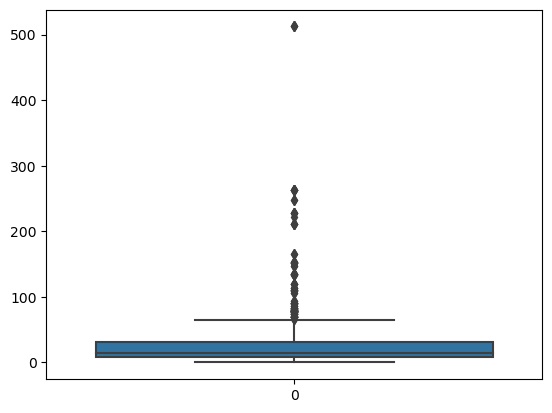

In [31]:
sns.boxplot(df['Fare'])

In [32]:
print('People with fare in between $200 and $300 = ',df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People with fare in greater than $300 = ',df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 =  17
People with fare in greater than $300 =  3


# Conclusion

- Highly skewed data, a lot of pepole have the cheaper tickets
- Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


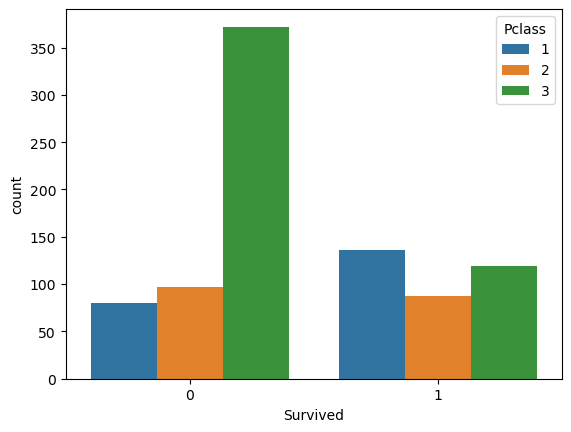

In [33]:
# mulitivariate analytsis

sns.countplot(data=df, x='Survived',hue='Pclass')
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


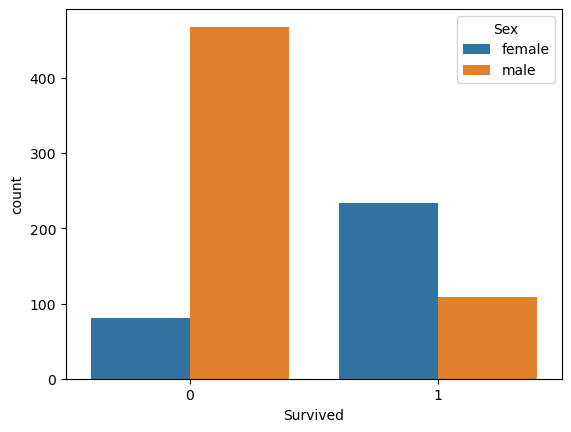

In [34]:
sns.countplot(data=df, x='Survived',hue='Sex')
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


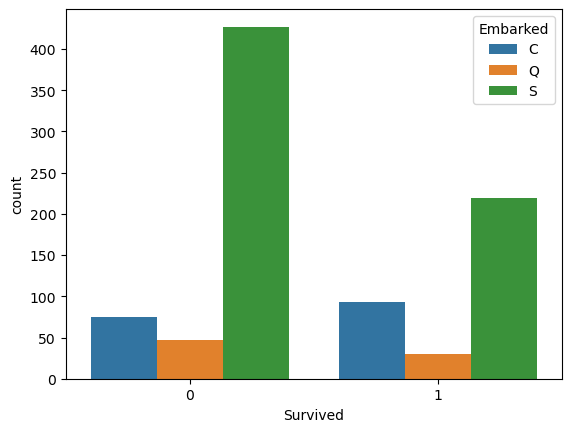

In [35]:
sns.countplot(data=df, x='Survived',hue='Embarked')
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\4277917745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\4277917745.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

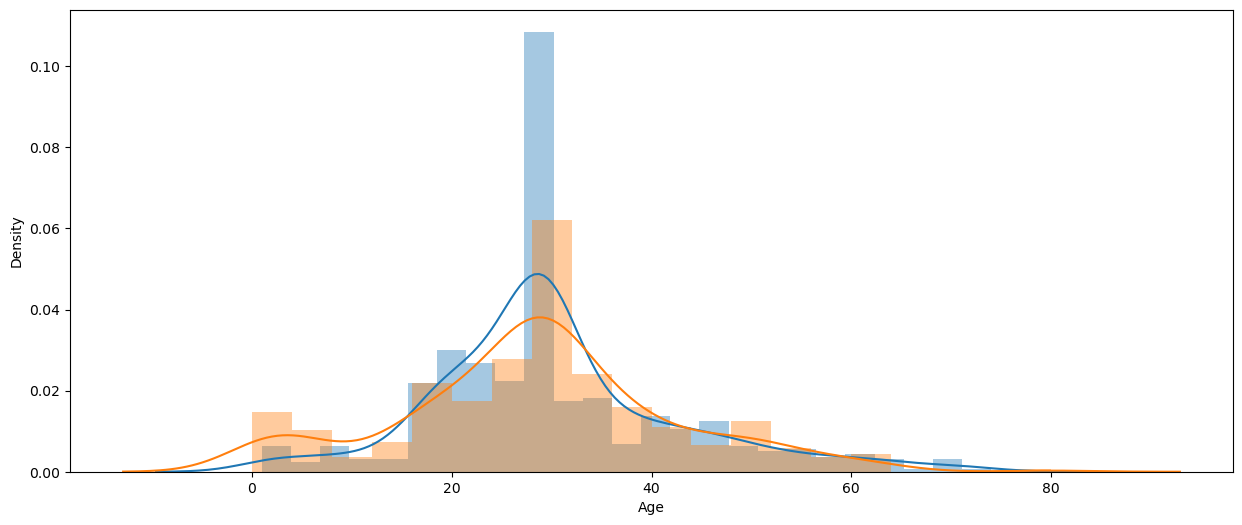

In [36]:
plt.figure(figsize = (15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])


C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\2547806193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\2547806193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

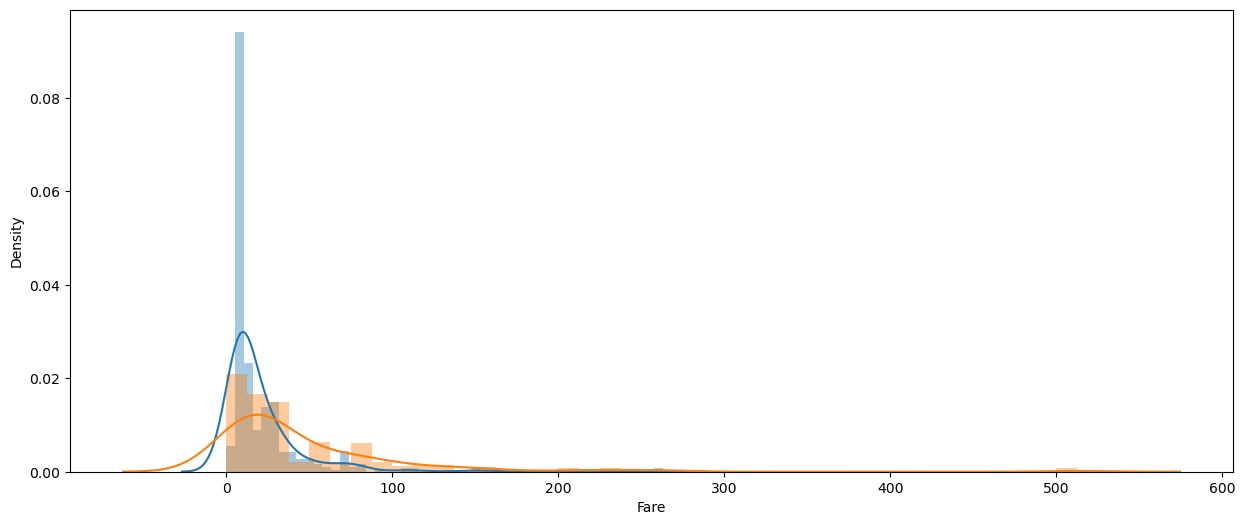

In [37]:
plt.figure(figsize = (15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])


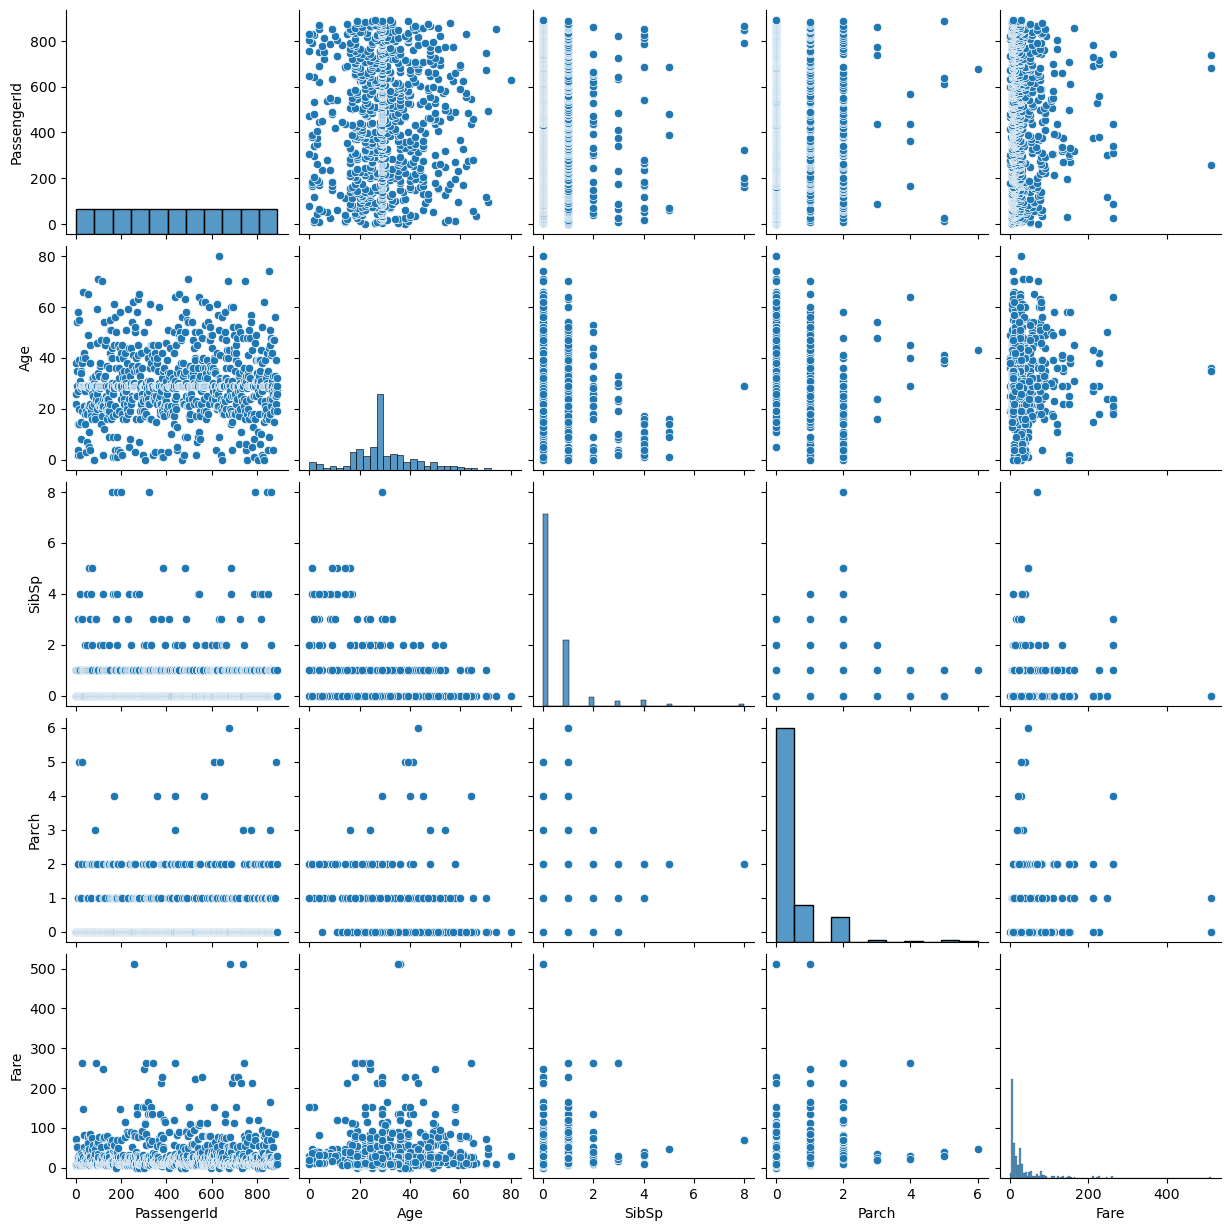

In [38]:
sns.pairplot(df)
plt.show()

C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

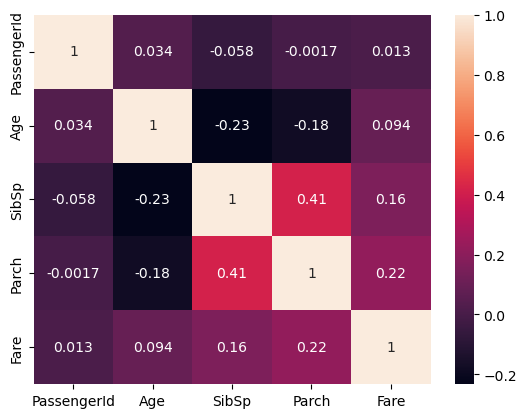

In [39]:
sns.heatmap(df.corr(),annot = True)

In [42]:
# Feature Engineering
# creating a new column by the name of family which will be the sum of SibSp and Parch cols

df['Family_size']=df['Parch'] + df['SibSp']

In [43]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,244310,13.000,S,0
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.000,S,0
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46,0,0,PC 17593,79.200,C,0
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20,0,0,SOTON/O2 3101287,7.925,S,0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,29,0,0,112379,39.600,C,0


In [44]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return'Medium'
    else:
        return 'Large'

In [45]:
df['Family_Type']=df['Family_size'].apply(family_type)

In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_Type
112,113,0,3,"Barton, Mr. David John",male,22,0,0,324669,8.0500,S,0,Alone
397,398,0,2,"McKane, Mr. Peter David",male,46,0,0,28403,26.0000,S,0,Alone
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49,1,0,PC 17485,56.9292,C,1,Medium
116,117,0,3,"Connors, Mr. Patrick",male,70,0,0,370369,7.7500,Q,0,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium


In [47]:
df.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [48]:
pd.crosstab(df['Family_Type'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

Survived,0,1
Family_Type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Deleting outliers
 ***Numarical Data***
- If the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier.
- If the data does not follow normal distribution,using boxplot we can eliminate points beyound Q1 - 1.5 and Q3 + 1.5IQR.

***Categorical Data***
- If the col is highly imbalanced for eg male 10000 and female 2 then we can eliminate female


In [52]:
# handling outliers in age almost normal

df=df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]
df.shape

(884, 10)

In [53]:
# Fare col is not following normal distribution.

Q1 = np.percentile(df['Fare'],25)
Q3 =  np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5 * (Q3 - Q1)
outlier_high = Q3 + 1.5 * (Q3 - Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']>outlier_high)]

In [54]:
# one hot encoding
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Type
393,394,1,1,"Newell, Miss. Marjorie",female,23,35273,113.275,C,Medium
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41,16966,134.500,C,Alone
435,436,1,1,"Carter, Miss. Lucile Polk",female,14,113760,120.000,S,Medium
537,538,1,1,"LeRoy, Miss. Bertha",female,30,PC 17761,106.425,C,Alone


In [56]:
# col to be trandfromed are Pclass,Sex, Embarked, Family_Type

pd.get_dummies(data = df, columns = ['Pclass','Sex', 'Embarked', 'Family_Type'], drop_first = True)
               

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Large,Family_Type_Medium
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,0,0,0,0,0,0,1
27,28,0,"Fortune, Mr. Charles Alexander",19,19950,263.0000,0,0,1,0,1,1,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",29,PC 17569,146.5208,0,0,0,0,0,0,1
34,35,0,"Meyer, Mr. Edgar Joseph",28,PC 17604,82.1708,0,0,1,0,0,0,1
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49,PC 17572,76.7292,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,"Sage, Mr. Douglas Bullen",29,CA. 2343,69.5500,0,1,1,0,1,1,0
849,850,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",29,17453,89.1042,0,0,0,0,0,0,1
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",45,36928,164.8667,0,0,0,0,1,0,1
863,864,0,"Sage, Miss. Dorothy Edith ""Dolly""",29,CA. 2343,69.5500,0,1,0,0,1,1,0


C:\Users\Rohit Kr\AppData\Local\Temp\ipykernel_20444\2127849711.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'summer',annot = True)


<Axes: >

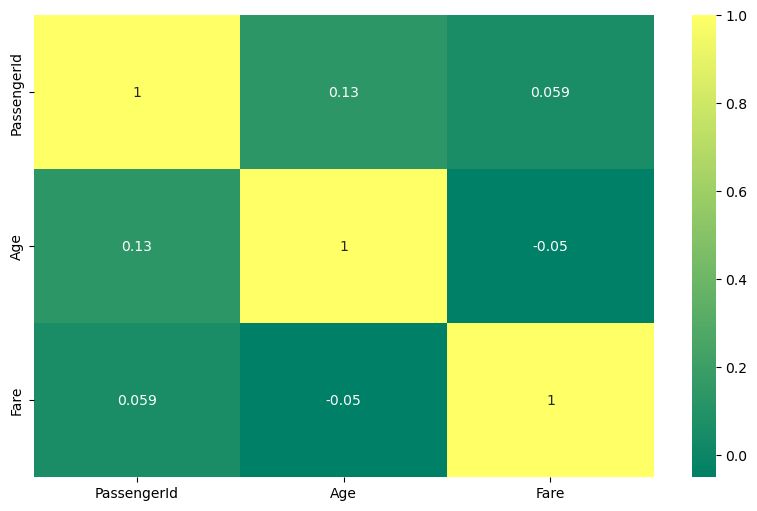

In [60]:
# Heatmap

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = 'summer',annot = True)


In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Type
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,19950,263.0000,S,Large
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29,PC 17569,146.5208,C,Medium
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28,PC 17604,82.1708,C,Medium
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,PC 17572,76.7292,C,Medium
...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29,CA. 2343,69.5500,S,Large
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29,17453,89.1042,C,Medium
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,36928,164.8667,S,Medium
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29,CA. 2343,69.5500,S,Large
